## Creating a Distribution

This notebook is for experimentation with creating random data based off of a linear trend.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import scipy.stats as stats

Here, a random distribution of points is created, with the true relationship being y=2x+0 and the standard deviation being 50, for added noise.

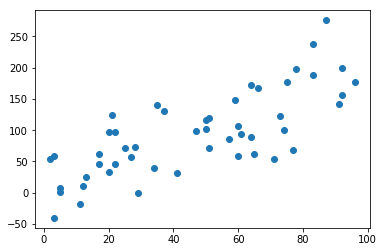

In [24]:
size = 50
slope = 2
intercept = 0
noise = np.random.normal(0, 50, size)
x = np.random.choice(range(1, 100), size, True)
y = slope * x + intercept + noise
plt.plot(x, y, "o")
plt.show()

In [151]:
def create_distrib(m=0, b=0, sd=0, low=0, high=100, size=100, by=5, even=False, show=True):
    
    if even:
        x = np.array(range(low, high+1, by))
        noise = np.random.normal(0, sd, len(x))
    else:
        noise = np.random.normal(0, sd, size)
        x = np.array(np.random.choice(range(low, high), size, True))
    
    y = np.array(m * x + b + noise)
    if show:
        plt.scatter(x, y)
        plt.show()

    dat = pd.DataFrame()
    dat = dat.assign(x=pd.Series(x))
    dat = dat.assign(y=pd.Series(y))
    return dat

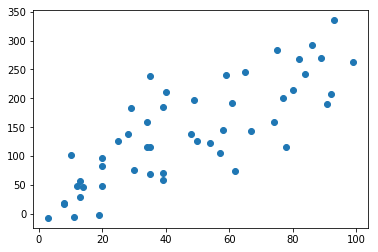

    x           y
0  20   96.163797
1  13   56.193743
2  20   82.774281
3  99  263.150316
4  40  211.148573


In [152]:
dat = create_distrib(3, 0, 50, 0, 100, size=50, show=True)
print(dat.head(5))

We can plot the same thing, but using the returned data frame

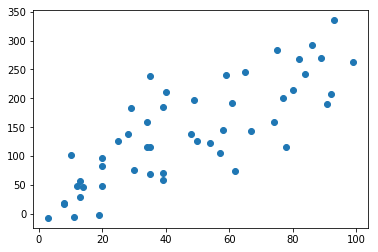

In [153]:
plt.scatter(dat['x'], dat['y'])
plt.show()

Here is the function to plot data with a linear regression line added, and a Pearson correlation R value returned. This code is from my `pearson_correlation.ipynb` notebook.

In [154]:
def plot_pearson(data, x_name, y_name, title=None, xlab=None, ylab=None):
    if not title:
        title = x_name + " vs. " + y_name
    if not xlab:
        xlab = x_name
    if not ylab:
        ylab = y_name
    x = scipy.array(data[x_name])
    y = scipy.array(data[y_name])
    slope, intercept, r, p, error = scipy.stats.linregress(x,y)
    line = slope * x + intercept
    plt.scatter(x, y)
    plt.plot(x, line, color='orange')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()
    return r

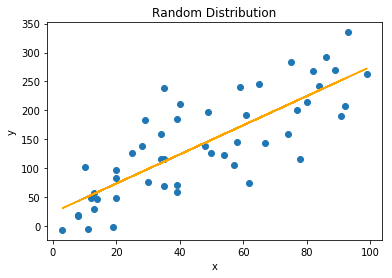

The R value is: 0.8045608254421711


In [155]:
r = plot_pearson(dat, "x", "y", title="Random Distribution")
print("The R value is:", r)

Next, lets do the same, but with a smaller standard deviation. The R value should be closer to 1.

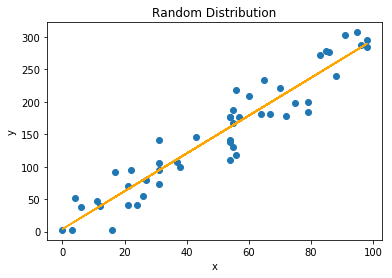

The R value is: 0.9509894473519569


In [156]:
dat = create_distrib(3, 0, 25, 0, 100, size=50, show=False)
r = plot_pearson(dat, "x", "y", title="Random Distribution")
print("The R value is:", r)

With a SD of 25 the R value of the Pearson correlation is a lot closer to 1.

So far the x value has been random within a specified range.
Next, lets have a set interval on the x axis.

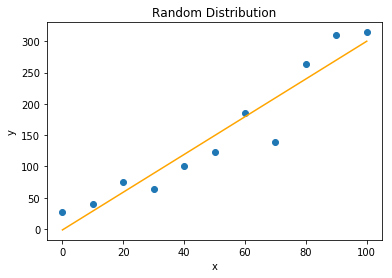

The R value is: 0.952812744500494


In [157]:
dat = create_distrib(3, 0, 25, 0, 100, by=10, show=False, even=True)
r = plot_pearson(dat, "x", "y", title="Random Distribution")
print("The R value is:", r)

I'll use this function to generate random sales data across a date range.